In [3]:
import numpy as np
import pandas as pd
import os
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader

from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [4]:
# loading wide table
df_wide = pd.read_csv('../microservices/dash_app/wide.csv')
df_wide['datetime'] = pd.to_datetime(df_wide['hour'], format='%Y-%m-%d %H:%M:%S')
df_wide = df_wide.set_index('datetime')

train_org_df = df_wide[df_wide.index.year == 2020]
test_org_df = df_wide[df_wide.index.year == 2021]

In [5]:
corr_cols = ['avg_all_post_pos', 'avg_all_post_neg', 'avg_all_post_neu',
       'cnt_all_user', 'cnt_all_tag', 'cnt_all_post', 'cnt_all_comments',
       'avg_gme_post_pos', 'avg_gme_post_neg', 'avg_gme_post_neu',
       'cnt_gme_user', 'cnt_gme_tag', 'cnt_gme_post', 'cnt_gme_comments',
       'volume', 'closeprice']

In [6]:
corr_matrix = df_wide[corr_cols].corr()

Text(0.5, 1.0, 'Triangle Correlation Heatmap')

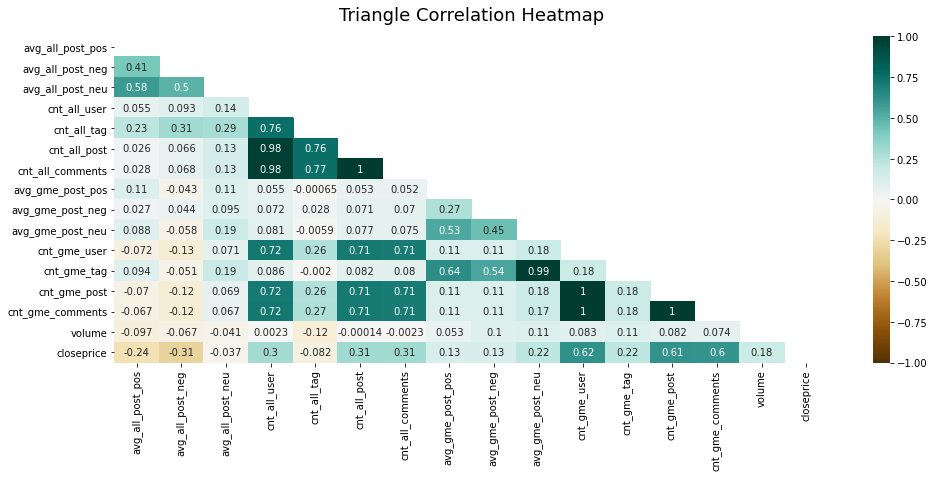

In [7]:


# Set up the matplotlib figure
plt.figure(figsize=(16, 6))

mask = np.triu(np.ones_like(corr_matrix, dtype=np.bool))
heatmap = sns.heatmap(corr_matrix, mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16)

Text(0.5, 1.0, 'Features Correlating with Close Price')

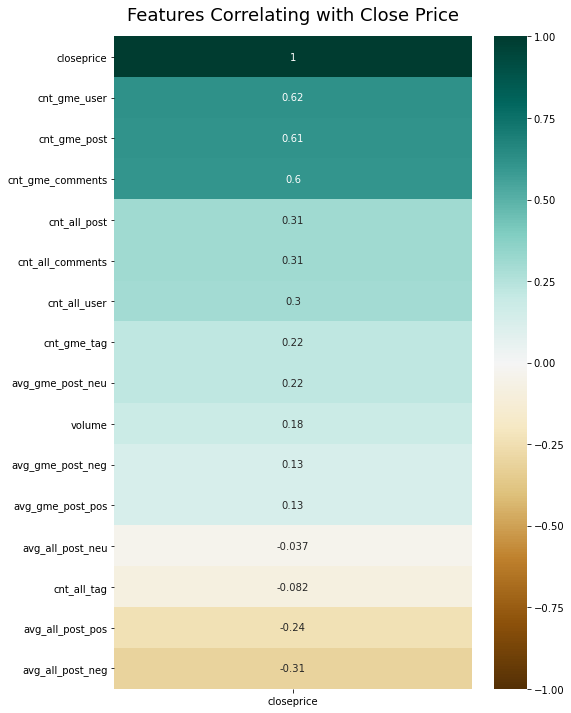

In [8]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(corr_matrix[['closeprice']].sort_values(by='closeprice', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Close Price', fontdict={'fontsize':18}, pad=16)

## Distribution of features

In [20]:
feature_set_wide = [
    "avg_all_post_pos",
    "avg_all_post_neg",
    "avg_all_post_neu",
    "cnt_all_user",
    "cnt_all_tag",
    "cnt_all_post",
    "cnt_all_comments",
    "avg_gme_post_pos",
    "avg_gme_post_neg",
    "avg_gme_post_neu",
    "cnt_gme_user",
    "cnt_gme_tag",
    "cnt_gme_post",
    "cnt_gme_comments",
    "volume",
    "openprice",
    "highprice",
    "lowprice",
    "closeprice"
]

feature_set_eng = [
    "avg_all_post_pos",
    "avg_all_post_neg",
    "avg_all_post_neu",
    "cnt_all_user",
    "cnt_all_tag",
    "cnt_all_post",
    "cnt_all_comments",
    "avg_gme_post_pos",
    "avg_gme_post_neg",
    "avg_gme_post_neu",
    "cnt_gme_user",
    "cnt_gme_tag",
    "cnt_gme_post",
    "cnt_gme_comments",
    "volume",
    "closeprice"
]

feature_label_cols = feature_set_eng
feature_cols = feature_label_cols[:-1]
label_cols = feature_label_cols[-1]

train_df = train_org_df[feature_label_cols]
test_df = test_org_df[feature_label_cols]

<AxesSubplot:xlabel='datetime'>

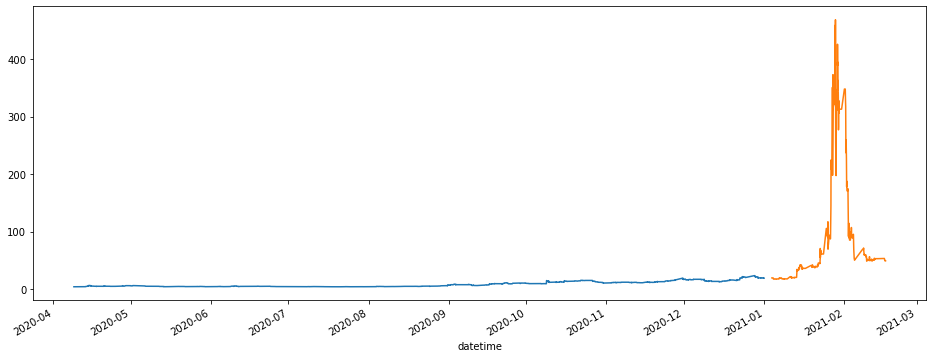

In [21]:
# close price for train and test datasets
plt.figure(figsize=(16, 6))
train_df[label_cols].plot()
test_df[label_cols].plot()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'avg_all_post_pos'),
  Text(1, 0, 'avg_all_post_neg'),
  Text(2, 0, 'avg_all_post_neu'),
  Text(3, 0, 'cnt_all_user'),
  Text(4, 0, 'cnt_all_tag'),
  Text(5, 0, 'cnt_all_post'),
  Text(6, 0, 'cnt_all_comments'),
  Text(7, 0, 'avg_gme_post_pos'),
  Text(8, 0, 'avg_gme_post_neg'),
  Text(9, 0, 'avg_gme_post_neu'),
  Text(10, 0, 'cnt_gme_user'),
  Text(11, 0, 'cnt_gme_tag'),
  Text(12, 0, 'cnt_gme_post'),
  Text(13, 0, 'cnt_gme_comments'),
  Text(14, 0, 'volume'),
  Text(15, 0, 'closeprice')])

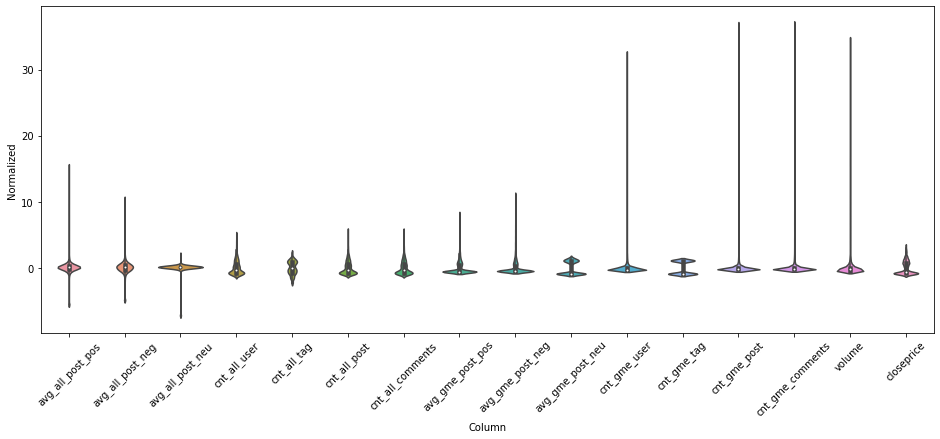

In [22]:
# Visualize the ditribution of the features in the train dataset
df_std = (train_df - train_df.mean()) / train_df.std()
df_std = df_std.melt(var_name='Column', value_name='Normalized')

plt.figure(figsize=(16, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'avg_all_post_pos'),
  Text(1, 0, 'avg_all_post_neg'),
  Text(2, 0, 'avg_all_post_neu'),
  Text(3, 0, 'cnt_all_user'),
  Text(4, 0, 'cnt_all_tag'),
  Text(5, 0, 'cnt_all_post'),
  Text(6, 0, 'cnt_all_comments'),
  Text(7, 0, 'avg_gme_post_pos'),
  Text(8, 0, 'avg_gme_post_neg'),
  Text(9, 0, 'avg_gme_post_neu'),
  Text(10, 0, 'cnt_gme_user'),
  Text(11, 0, 'cnt_gme_tag'),
  Text(12, 0, 'cnt_gme_post'),
  Text(13, 0, 'cnt_gme_comments'),
  Text(14, 0, 'volume'),
  Text(15, 0, 'closeprice')])

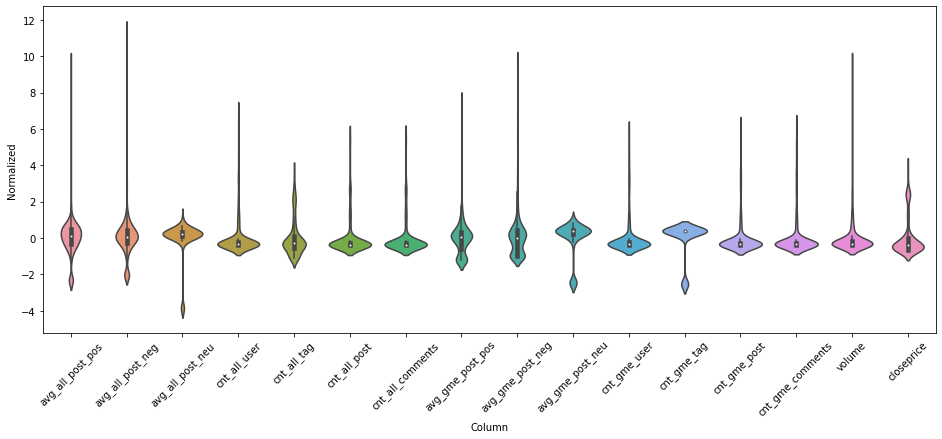

In [23]:
# distribution of features in test dataset
df_std = (test_df - test_df.mean()) / test_df.std()
df_std = df_std.melt(var_name='Column', value_name='Normalized')

plt.figure(figsize=(16, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
plt.xticks(rotation=45)